## Africa Economic, Banking and Systemic Crisis Data Regression project


In [15]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

## 1. EDA
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [2]:
df = pd.read_csv('../datasets/african_crises.csv',index_col='cc3')
df.head(2)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
cc3,,,,,,,,,,,,,
DZA,1,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,crisis
DZA,1,Algeria,1871,0,0.053,0,0,0.000,14.149,0,0,0,no_crisis


In [3]:
df.columns

Index(['case', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

### Converting categorical data to numerical data

In [3]:
df['banking_crisis'] = df.banking_crisis.replace({'crisis':1,'no_crisis':0})
df.head(2)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
cc3,,,,,,,,,,,,,
DZA,1,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,1
DZA,1,Algeria,1871,0,0.053,0,0,0.000,14.149,0,0,0,0


In [5]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000
mean,35.614,1967.768,0.077,43.141,0.040,0.153,0.006,20848.892,0.776,0.132,0.129,0.089
std,23.692,33.531,0.267,111.475,0.195,0.360,0.044,675727.429,0.417,0.350,0.336,0.285
min,1.000,1860.000,0.000,0.000,0.000,0.000,0.000,-28.502,0.000,0.000,0.000,0.000
25%,15.000,1951.000,0.000,0.195,0.000,0.000,0.000,2.086,1.000,0.000,0.000,0.000
50%,38.000,1973.000,0.000,0.868,0.000,0.000,0.000,5.762,1.000,0.000,0.000,0.000
75%,56.000,1994.000,0.000,8.463,0.000,0.000,0.000,11.644,1.000,0.000,0.000,0.000
max,70.000,2014.000,1.000,744.306,1.000,1.000,0.400,21989695.220,1.000,2.000,1.000,1.000


In [7]:
# Checking for null values

df.isnull().sum()

case                               0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

***So there is no null data points, we can go ahead now.***

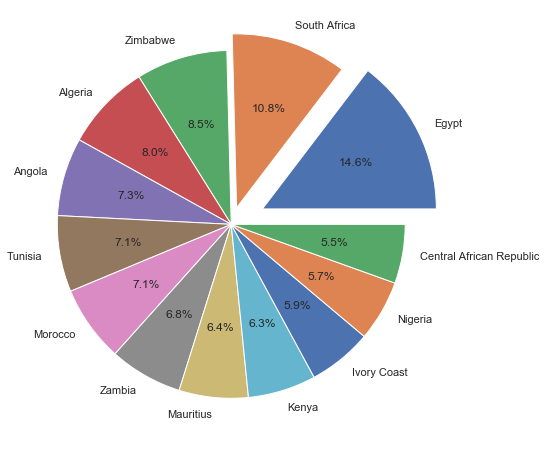

In [11]:
# Dataset is non-uniform and recently formed countries have least data
plt.figure(figsize=(8,8))
counts= df['country'].value_counts()
country=counts.index
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0)
plt.pie(counts, explode=explode,labels=country,autopct='%1.1f%%')
plt.show()

### Taking only Egypt data

In [29]:
data = df.drop('country',axis=1)
X = data.drop('banking_crisis',axis=1)
y = data['banking_crisis']

In [30]:
X.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
cc3,,,,,,,,,,,
DZA,1,1870,1,0.052,0,0,0.000,3.441,0,0,0
DZA,1,1871,0,0.053,0,0,0.000,14.149,0,0,0
DZA,1,1872,0,0.052,0,0,0.000,-3.719,0,0,0
DZA,1,1873,0,0.052,0,0,0.000,11.204,0,0,0
DZA,1,1874,0,0.051,0,0,0.000,-3.849,0,0,0


### Train Test Split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Model building for classification

In [33]:
model = LogisticRegression()

### Training the model

In [34]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model evaluation

In [35]:
prediction = model.predict(X_test)

In [36]:
prediction

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print("**"*40+'\n\n')
print(classification_report(y_test,prediction))
print("**"*40+'\n\n')

********************************************************************************


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       0.89      0.94      0.92        36

    accuracy                           0.98       318
   macro avg       0.94      0.97      0.95       318
weighted avg       0.98      0.98      0.98       318

********************************************************************************




In [47]:
print("**"*40+'\n\n')
print('Confusion matrix\n')
print(str(confusion_matrix(y_test,prediction))+'\n\n')
print("**"*40+'\n\n')

********************************************************************************


Confusion matrix

[[278   4]
 [  2  34]]


********************************************************************************


